In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from keras.layers import Conv2D, MaxPool2D, Flatten, Dense, Dropout

In [ ]:
# Google drive mount
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Setup the train and test directories
train_dir = "drive/MyDrive/Colab Notebooks/Internship/lesson_18/dataset/train/"
test_dir = "drive/MyDrive/Colab Notebooks/Internship/lesson_18/dataset/test/"

In [ ]:
# Create ImageDataGenerator training instance with data augmentation
train_datagen_augmented = ImageDataGenerator(rescale=1/255.,
                                             rotation_range=20, # rotate the image slightly between 0 and 20 degrees
                                             shear_range=0.2, # shear the image
                                             zoom_range=0.2, # zoom into the image
                                             width_shift_range=0.2, # shift the image width ways
                                             height_shift_range=0.2, # shift the image height ways
                                             horizontal_flip=True) # flip the image on the horizontal axis

In [ ]:
# Import data and augment it from directories
train_data_augmented_shuffled = train_datagen_augmented.flow_from_directory(train_dir,
                                                                            target_size=(224, 224),
                                                                            batch_size=32,
                                                                            class_mode='categorical',
                                                                            shuffle=True) # Shuffle data (default)

Found 4500 images belonging to 3 classes.


In [ ]:
# Create ImageDataGenerator test instance without data augmentation
test_datagen = ImageDataGenerator(rescale=1/255.)

In [ ]:
test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(224, 224),
                                             batch_size=32,
                                             class_mode='categorical')

Found 900 images belonging to 3 classes.


In [ ]:
model = tf.keras.models.Sequential([Conv2D(filters=32, 
                                           kernel_size=3,
                                           activation="relu", 
                                           input_shape=(224, 224, 3)),
                                    Conv2D(64, 3, activation="relu"),
                                    MaxPool2D(2),
                                    Conv2D(128, 3, activation="relu"),
                                    MaxPool2D(2),
                                    Conv2D(256, 3, activation="relu"),
                                    MaxPool2D(2),
                                    Conv2D(512, 3, activation="relu"),
                                    MaxPool2D(2),
                                    Flatten(),
                                    Dropout(0.7),
                                    Dense(2048, activation = 'relu'),
                                    Dense(3, activation="softmax")])

In [ ]:
# Compile the model
model.compile(loss="categorical_crossentropy",
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

In [ ]:
# Check out the layers in our model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 64)      18496     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 110, 110, 64)     0         
 )                                                               
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 128)     73856     
                                                                 
 max_pooling2d_1 (MaxPooling  (None, 54, 54, 128)      0         
 2D)                                                             
                                                                 
 conv2d_3 (Conv2D)           (None, 52, 52, 256)       2

In [ ]:
# Fit the model
history = model.fit(train_data_augmented_shuffled,
                    epochs=25,
                    steps_per_epoch=len(train_data_augmented_shuffled),
                    validation_data=test_data,
                    validation_steps=len(test_data))

Epoch 1/25
141/141 [==============================] - 1254s 9s/step - loss: 1.1207 - accuracy: 0.4133 - val_loss: 0.9716 - val_accuracy: 0.5111
Epoch 2/25
141/141 [==============================] - 71s 502ms/step - loss: 0.9133 - accuracy: 0.5742 - val_loss: 0.8028 - val_accuracy: 0.6611
Epoch 3/25
141/141 [==============================] - 70s 498ms/step - loss: 0.7479 - accuracy: 0.6936 - val_loss: 0.5544 - val_accuracy: 0.8111
Epoch 4/25
141/141 [==============================] - 71s 499ms/step - loss: 0.6842 - accuracy: 0.7227 - val_loss: 0.5402 - val_accuracy: 0.7944
Epoch 5/25
141/141 [==============================] - 70s 499ms/step - loss: 0.6541 - accuracy: 0.7413 - val_loss: 0.5790 - val_accuracy: 0.7844
Epoch 6/25
141/141 [==============================] - 71s 501ms/step - loss: 0.6410 - accuracy: 0.7473 - val_loss: 0.5155 - val_accuracy: 0.8067
Epoch 7/25
141/141 [==============================] - 71s 501ms/step - loss: 0.6235 - accuracy: 0.7513 - val_loss: 0.4777 - val_acc

In [ ]:
def plot_loss_curves(history):
    """
    Returns separate loss curves for training and validation metrics.
    """ 
    loss = history.history['loss']
    val_loss = history.history['val_loss']

    accuracy = history.history['accuracy']
    val_accuracy = history.history['val_accuracy']

    epochs = range(len(history.history['loss']))

    # Plot loss
    plt.plot(epochs, loss, label='training_loss')
    plt.plot(epochs, val_loss, label='val_loss')
    plt.title('Loss')
    plt.xlabel('Epochs')
    plt.legend()

    # Plot accuracy
    plt.figure()
    plt.plot(epochs, accuracy, label='training_accuracy')
    plt.plot(epochs, val_accuracy, label='val_accuracy')
    plt.title('Accuracy')
    plt.xlabel('Epochs')
    plt.legend()

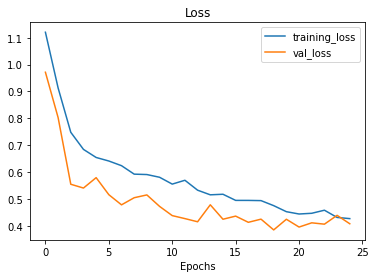

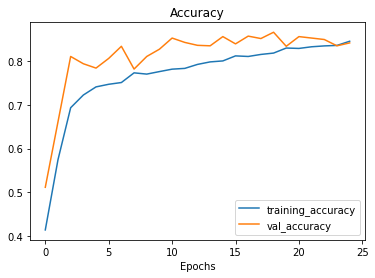

In [ ]:
# Check out the loss curves of model
plot_loss_curves(history)

In [ ]:
# Create a function to import an image and resize it to be able to be used with our model
def load_and_prep_image(filename, img_shape=224):
    """
    Reads an image from filename, turns it into a tensor
    and reshapes it to (img_shape, img_shape, colour_channel).
    """
    # Read in target file (an image)
    img = tf.io.read_file(filename)

    # Decode the read file into a tensor & ensure 3 colour channels 
    # (our model is trained on images with 3 colour channels
    # but sometimes images have 4 colour channels)
    img = tf.image.decode_image(img, channels=3)

    # Resize the image (to the same size our model was trained on)
    img = tf.image.resize(img, size = [img_shape, img_shape])

    # Rescale the image (get all values between 0 and 1)
    img = img/255.
    return img

In [ ]:
class_names = ["chicken", "sheep", "squirrel"]

In [ ]:
def pred_and_plot(model, filename, class_names):
      """
      Imports an image located at filename, makes a prediction on it with
      a trained model and plots the image with the predicted class as the title.
      """
      # Import the target image and preprocess it
      img = load_and_prep_image(filename)

      # Make a prediction
      pred = model.predict(tf.expand_dims(img, axis=0))

      # Get the predicted class
      pred_list = list(pred[0])
      pred_index = pred_list.index(max(pred_list))
      pred_class = class_names[pred_index] 

      # Plot the image and predicted class
      plt.imshow(img)
      plt.title(f"Prediction: {pred_class}")
      plt.show()

### Демонстрация работы обученного трехкатегориального классификатора

--2022-05-25 20:24:57--  https://c.files.bbci.co.uk/19E4/production/_123982660_sheep_getty.jpg
Resolving c.files.bbci.co.uk (c.files.bbci.co.uk)... 23.218.100.179, 2600:1409:3800:1a3::f33, 2600:1409:3800:182::f33, ...
Connecting to c.files.bbci.co.uk (c.files.bbci.co.uk)|23.218.100.179|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 336803 (329K) [image/jpeg]
Saving to: ‘_123982660_sheep_getty.jpg’

_123982660_sheep_ge 100%[===================>] 328.91K  --.-KB/s    in 0.02s   

2022-05-25 20:24:57 (14.4 MB/s) - ‘_123982660_sheep_getty.jpg’ saved [336803/336803]



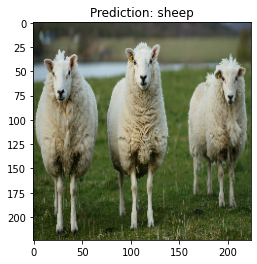

In [ ]:
# View our example image
!wget https://c.files.bbci.co.uk/19E4/production/_123982660_sheep_getty.jpg
# Test our model on a custom image
pred_and_plot(model, "_123982660_sheep_getty.jpg", class_names)

--2022-05-25 20:24:58--  https://www.fanon.hr/media/k2/items/cache/0ef95987526970d668cbb7995fe36b10_XL.jpg
Resolving www.fanon.hr (www.fanon.hr)... 85.25.97.218
Connecting to www.fanon.hr (www.fanon.hr)|85.25.97.218|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 64038 (63K) [image/jpeg]
Saving to: ‘0ef95987526970d668cbb7995fe36b10_XL.jpg’

0ef95987526970d668c 100%[===================>]  62.54K   205KB/s    in 0.3s    

2022-05-25 20:24:59 (205 KB/s) - ‘0ef95987526970d668cbb7995fe36b10_XL.jpg’ saved [64038/64038]



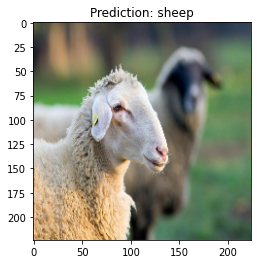

In [ ]:
!wget https://www.fanon.hr/media/k2/items/cache/0ef95987526970d668cbb7995fe36b10_XL.jpg
pred_and_plot(model, "0ef95987526970d668cbb7995fe36b10_XL.jpg", class_names)

--2022-05-25 20:25:00--  https://img.freepik.com/free-photo/sheep-in-green-field_62754-1358.jpg?w=2000
Resolving img.freepik.com (img.freepik.com)... 23.55.185.141, 2600:1409:9800:68d::30ec, 2600:1409:9800:68f::30ec
Connecting to img.freepik.com (img.freepik.com)|23.55.185.141|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 464079 (453K) [image/jpeg]
Saving to: ‘sheep-in-green-field_62754-1358.jpg?w=2000’

sheep-in-green-fiel 100%[===================>] 453.20K   667KB/s    in 0.7s    

2022-05-25 20:25:01 (667 KB/s) - ‘sheep-in-green-field_62754-1358.jpg?w=2000’ saved [464079/464079]



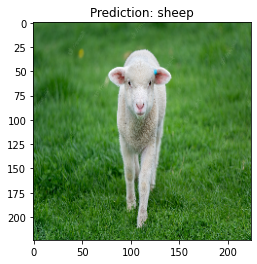

In [ ]:
!wget https://img.freepik.com/free-photo/sheep-in-green-field_62754-1358.jpg?w=2000
pred_and_plot(model, "sheep-in-green-field_62754-1358.jpg?w=2000", class_names)

--2022-05-25 20:25:02--  https://cdn.mos.cms.futurecdn.net/BX7vjSt8KMtcBHyisvcSPK.jpg
Resolving cdn.mos.cms.futurecdn.net (cdn.mos.cms.futurecdn.net)... 8.252.43.252, 8.252.68.124, 8.252.194.124
Connecting to cdn.mos.cms.futurecdn.net (cdn.mos.cms.futurecdn.net)|8.252.43.252|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 278489 (272K) [image/jpeg]
Saving to: ‘BX7vjSt8KMtcBHyisvcSPK.jpg’

BX7vjSt8KMtcBHyisvc 100%[===================>] 271.96K  --.-KB/s    in 0.02s   

2022-05-25 20:25:02 (12.0 MB/s) - ‘BX7vjSt8KMtcBHyisvcSPK.jpg’ saved [278489/278489]



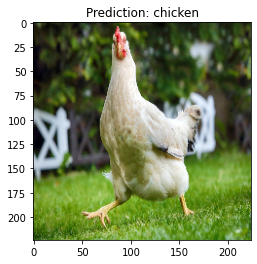

In [ ]:
!wget https://cdn.mos.cms.futurecdn.net/BX7vjSt8KMtcBHyisvcSPK.jpg
pred_and_plot(model, "BX7vjSt8KMtcBHyisvcSPK.jpg", class_names)

--2022-05-25 20:25:02--  https://inseact.com/wp-content/uploads/2021/09/Chiken-1024x755.jpg
Resolving inseact.com (inseact.com)... 194.163.35.222
Connecting to inseact.com (inseact.com)|194.163.35.222|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 98823 (97K) [image/jpeg]
Saving to: ‘Chiken-1024x755.jpg’

Chiken-1024x755.jpg 100%[===================>]  96.51K   311KB/s    in 0.3s    

2022-05-25 20:25:03 (311 KB/s) - ‘Chiken-1024x755.jpg’ saved [98823/98823]



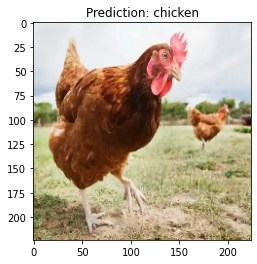

In [ ]:
!wget https://inseact.com/wp-content/uploads/2021/09/Chiken-1024x755.jpg
pred_and_plot(model, "Chiken-1024x755.jpg", class_names)

--2022-05-25 20:25:04--  https://a-z-animals.com/media/2019/11/Chicken-rooster-in-grass.jpg
Resolving a-z-animals.com (a-z-animals.com)... 172.67.41.197, 104.22.0.252, 104.22.1.252, ...
Connecting to a-z-animals.com (a-z-animals.com)|172.67.41.197|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 78791 (77K) [image/jpeg]
Saving to: ‘Chicken-rooster-in-grass.jpg’

Chicken-rooster-in- 100%[===================>]  76.94K  --.-KB/s    in 0.008s  

2022-05-25 20:25:04 (9.25 MB/s) - ‘Chicken-rooster-in-grass.jpg’ saved [78791/78791]



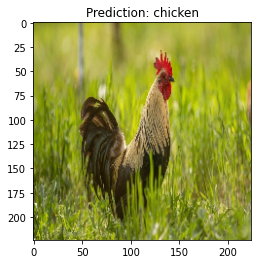

In [ ]:
!wget https://a-z-animals.com/media/2019/11/Chicken-rooster-in-grass.jpg
pred_and_plot(model, "Chicken-rooster-in-grass.jpg", class_names)

--2022-05-25 20:25:04--  https://mediaproxy.salon.com/width/1200/https://media.salon.com/2021/12/squirrel-holds-a-nut-1217211.jpg
Resolving mediaproxy.salon.com (mediaproxy.salon.com)... 18.65.229.10, 18.65.229.33, 18.65.229.12, ...
Connecting to mediaproxy.salon.com (mediaproxy.salon.com)|18.65.229.10|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 128981 (126K) [image/jpeg]
Saving to: ‘squirrel-holds-a-nut-1217211.jpg’

squirrel-holds-a-nu 100%[===================>] 125.96K  --.-KB/s    in 0.01s   

2022-05-25 20:25:04 (10.5 MB/s) - ‘squirrel-holds-a-nut-1217211.jpg’ saved [128981/128981]



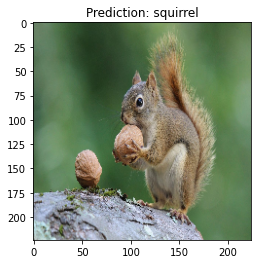

In [ ]:
!wget https://mediaproxy.salon.com/width/1200/https://media.salon.com/2021/12/squirrel-holds-a-nut-1217211.jpg
pred_and_plot(model, "squirrel-holds-a-nut-1217211.jpg", class_names)

--2022-05-25 20:25:05--  https://i.insider.com/61ccd735cc94ab0019d2fa21?width=700
Resolving i.insider.com (i.insider.com)... 151.101.2.217, 151.101.66.217, 151.101.130.217, ...
Connecting to i.insider.com (i.insider.com)|151.101.2.217|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 55713 (54K) [image/jpeg]
Saving to: ‘61ccd735cc94ab0019d2fa21?width=700’

61ccd735cc94ab0019d 100%[===================>]  54.41K  --.-KB/s    in 0.006s  

2022-05-25 20:25:05 (8.70 MB/s) - ‘61ccd735cc94ab0019d2fa21?width=700’ saved [55713/55713]



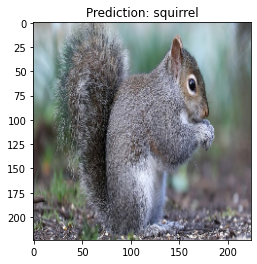

In [ ]:
!wget https://i.insider.com/61ccd735cc94ab0019d2fa21?width=700
pred_and_plot(model, "61ccd735cc94ab0019d2fa21?width=700", class_names)

--2022-05-25 20:25:05--  https://www.animalaid.org.uk/wp-content/uploads/2018/06/squirrel-2962847_960_720.jpg
Resolving www.animalaid.org.uk (www.animalaid.org.uk)... 35.197.249.132
Connecting to www.animalaid.org.uk (www.animalaid.org.uk)|35.197.249.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 132020 (129K) [image/jpeg]
Saving to: ‘squirrel-2962847_960_720.jpg’

squirrel-2962847_96 100%[===================>] 128.93K   370KB/s    in 0.3s    

2022-05-25 20:25:06 (370 KB/s) - ‘squirrel-2962847_960_720.jpg’ saved [132020/132020]



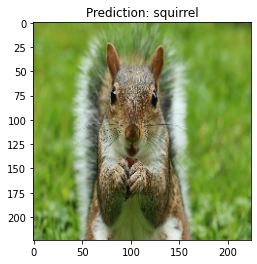

In [ ]:
!wget https://www.animalaid.org.uk/wp-content/uploads/2018/06/squirrel-2962847_960_720.jpg
pred_and_plot(model, "squirrel-2962847_960_720.jpg", class_names)